In [0]:
import numpy as np
import pandas as pd
import cv2 
import os 
import tensorflow as tf
from PIL import Image

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [23]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [25]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [26]:
#before we run our fit function we know that it requires 2 dimensional data, so we have to reshape our input

X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)



print(X_train.shape)

(50000, 3072)


In [0]:
Y_train = np.ravel(y_train)
Y_test = np.ravel(y_test)

In [0]:
x_train_gray = []
for i in x_train:
  img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  x_train_gray.append(img)

In [0]:
x_test_gray = []
for i in x_test:
  img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  x_test_gray.append(img)

In [31]:
x_train_gray[0]

array([[ 62,  45,  47, ..., 128, 121, 120],
       [ 20,   0,   7, ...,  82,  77,  82],
       [ 23,   6,  24, ...,  78,  78,  68],
       ...,
       [152, 123, 125, ..., 117,  27,  32],
       [131, 104, 115, ..., 136,  58,  51],
       [139, 123, 130, ..., 174, 112,  90]], dtype=uint8)

In [0]:
x_train_gray = np.array(x_train_gray).astype('float32')
x_test_gray = np.array(x_test_gray).astype('float32')
x_train_gray /=255.0
x_test_gray /= 255.0

In [37]:

X_train_gray = x_train_gray.reshape(len(x_train_gray), -1).astype('float32')
X_test_gray = x_test_gray.reshape(len(x_test_gray), -1).astype('float32')


print(X_train_gray.shape)

(50000, 1024)


In [38]:
x_train_gray[0]

array([[0.24313726, 0.1764706 , 0.18431373, ..., 0.5019608 , 0.4745098 ,
        0.47058824],
       [0.07843138, 0.        , 0.02745098, ..., 0.32156864, 0.3019608 ,
        0.32156864],
       [0.09019608, 0.02352941, 0.09411765, ..., 0.30588236, 0.30588236,
        0.26666668],
       ...,
       [0.59607846, 0.48235294, 0.49019608, ..., 0.45882353, 0.10588235,
        0.1254902 ],
       [0.5137255 , 0.40784314, 0.4509804 , ..., 0.53333336, 0.22745098,
        0.2       ],
       [0.54509807, 0.48235294, 0.50980395, ..., 0.68235296, 0.4392157 ,
        0.3529412 ]], dtype=float32)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logisticRegr = LogisticRegression(max_iter = 500, n_jobs = 6, solver = 'lbfgs', multi_class = 'auto')

In [41]:
logisticRegr.fit(X_train_gray, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=6, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logisticRegr.predict(X_test_gray)

In [43]:
score = logisticRegr.score(X_test_gray, Y_test)
print(score)

0.2929


In [0]:
import seaborn as sns
from sklearn import metrics

In [0]:
cm = metrics.confusion_matrix(Y_test, predictions)

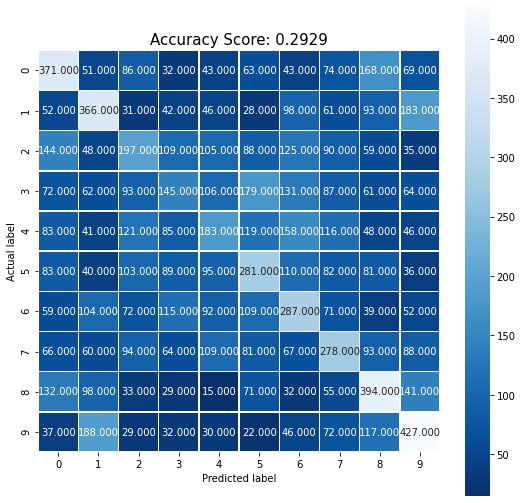

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()